In [88]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 15


In [89]:
def log_loss_metric(y_true, y_pred):
    y_pred_clip = np.clip(y_pred, 1e-15, 1 - 1e-15)
    loss = - np.mean(np.mean(y_true * np.log(y_pred_clip) + (1 - y_true) * np.log(1 - y_pred_clip), axis = 1))
    return loss

In [105]:
ground_truth_label = np.array([[0.]])
wrong_pred = np.array([0.9])
smooth_pred = np.array([0.8])

sample_preds = np.linspace(0.001, 0.9999, 100)

losses_on_sample_preds = [log_loss_metric(ground_truth_label, sample_preds[i].reshape(1,-1)) for i in range(len(sample_preds))]

In [106]:
FP = (wrong_pred[0], log_loss_metric(ground_truth_label, wrong_pred.reshape(1,-1)))
FP_smoothed = (wrong_pred[0], log_loss_metric(ground_truth_label, smooth_pred.reshape(1,-1)))

TP = (0, 0)
TP_smoothed = (0, 0.2)

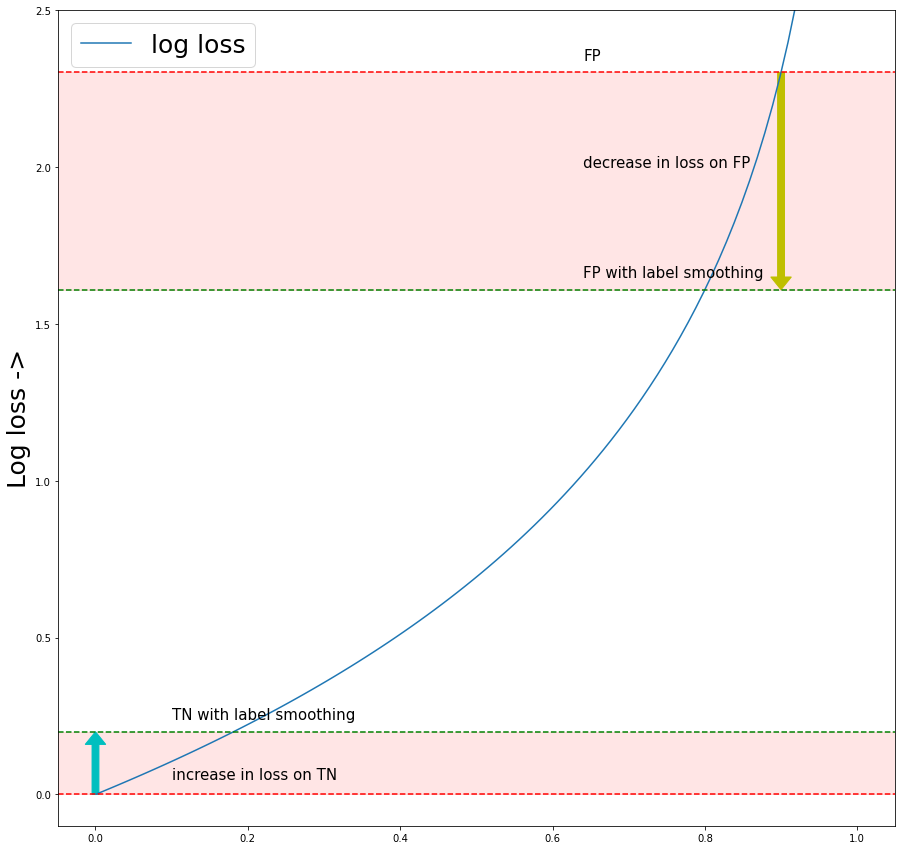

In [153]:
plt.plot(sample_preds, losses_on_sample_preds, label = "log loss")

plt.axhline(FP[1], c = "r", linestyle = "--")
plt.axhline(FP_smoothed[1], c = "g", linestyle = "--")


plt.axhline(TP[1], c = "r", linestyle = "--")
plt.axhline(TP_smoothed[1], c = "g", linestyle = "--")

plt.axhspan(FP[1], FP_smoothed[1], color = "red", alpha = 0.1)
plt.axhspan(TP[1], TP_smoothed[1], color = "red", alpha = 0.1)

plt.arrow(FP[0], FP[1],0, FP_smoothed[1]- FP[1], width = 0.009, length_includes_head=True, label = "decrease in loss on False positive", color = "y") 
plt.text(0.64 , 2, s = "decrease in loss on FP", fontsize = "15")
plt.text(0.64 , 2.34, s = "FP", fontsize = "15")
plt.text(0.64 , 1.65, s = "FP with label smoothing", fontsize = "15")



plt.arrow(TP[0], TP[1],0, TP_smoothed[1]- TP[1], width = 0.009, length_includes_head=True, label = "increase in loss for True negative ", color = "c") 
plt.text(0.1 , 0.05, s = "increase in loss on TN", fontsize = "15")
plt.text(0.1 , 0.24, s = "TN with label smoothing", fontsize = "15")


plt.legend(fontsize = 25)
plt.ylabel("Log loss ->", fontsize = 25)
plt.ylim(-0.1, 2.5)
plt.show()